### Análisis Exploratorio (Bi-Variado)

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 

from scipy.stats import pearsonr, spearmanr, kendalltau, shapiro
from scipy.stats import ttest_ind

Cuando trabajamos con Jupyter Notebook, a menudo necesitamos instalar nuevos paquetes para que estén disponibles en nuestro entorno de trabajo. La forma más común de hacer esto es utilizando los comandos !pip o %pip en una celda de código. Sin embargo, estas dos formas de instalación pueden generar problemas, especialmente si estamos trabajando en un entorno compartido o si utilizamos diferentes versiones de Python.

In [38]:
# !pip install statsmodel
#%pip install statsmodel

Por lo tanto, para evitar posibles errores al instalar paquetes, se recomienda utilizar el método de importación de módulos a través de la librería "sys". Este método es más seguro y estable, ya que se asegura de que los paquetes estén instalados en el lugar correcto y sean compatibles con la versión de Python que estamos utilizando.

In [39]:
import sys
!{sys.executable} -m pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [40]:
#  Configuración para que las visualizaciones creadas con esta librería se muestren directamente en la celda de salida del notebook
%matplotlib inline

# Configuración de Seaborn para visualizaciones más atractivas
sns.set_style('whitegrid') # Estilo del fondo de los gráficos
sns.set_palette('deep') # Usamos la paleta de colores 'deep' de Seaborn

# Configuración de Pandas para imprimir menos decimales
pd.set_option('display.precision', 2)
np.set_printoptions(precision=2)

# Configuración de Pandas para imprimir todas las columnas en DataFrames
pd.set_option('display.max_columns', None)

In [41]:
# Cargar el dataset de muestra iris
iris = sns.load_dataset("iris")

In [42]:
# crear una variable ordinal para la longitud del sépalo
iris['sepal_length_ord'] = pd.cut(iris['sepal_length'], bins=[0, 5.5, 6.5, 8], labels=['corto', 'medio', 'largo'])

iris['petal_length_ord'] = pd.cut(iris['petal_length'], bins=[0, 2.5, 4.5, 7], labels=['corto', 'medio', 'largo'])


In [43]:
# Coeficiente de correlación de Pearson
corr_pearson, _ = pearsonr(iris['sepal_length'], iris['petal_length'])

# Coeficiente de correlación de Spearman
corr_spearman, _ = spearmanr(iris['sepal_length'], iris['petal_length'])

# Coeficiente de correlación de Kendall
corr_kendall, _ = kendalltau(iris['sepal_length_ord'], iris['petal_length_ord'])

In [44]:
print("Coeficiente de correlación de Pearson:", corr_pearson)
print("Coeficiente de correlación de Spearman:", corr_spearman)
print("Coeficiente de correlación de Kendall:", corr_kendall)

Coeficiente de correlación de Pearson: 0.8717537758865831
Coeficiente de correlación de Spearman: 0.881898126434986
Coeficiente de correlación de Kendall: 0.5269315862271348


In [45]:
kendalltau(iris['sepal_length'], iris['petal_length'])

SignificanceResult(statistic=0.7185159275387326, pvalue=1.1691259442824266e-36)

Los resultados indican que hay una correlación significativa entre las dos variables evaluadas. El valor de estadística de 0.7185 sugiere que la correlación es fuerte. El valor de p-valor extremadamente pequeño (1.1691259442824266e-36) indica que hay una probabilidad extremadamente baja de que la correlación observada sea un resultado del azar. En general, se puede concluir que hay una correlación significativa y fuerte entre las dos variables evaluadas.

El valor p es un número que se usa para determinar si un resultado estadístico es significativo o no. Si el valor p es menor que 0.05, generalmente se considera que el resultado es significativo, lo que significa que la probabilidad de que el resultado se haya producido por azar es muy baja (menos del 5%). Esto significa que es probable que el resultado sea real y no simplemente un error estadístico aleatorio. Por otro lado, si el valor p es mayor que 0.05, se considera que el resultado no es significativo, lo que significa que es posible que el resultado se haya producido por azar y no es estadísticamente significativo

Es posible utilizar la prueba de correlación de Kendall (Kendall tau) con datos continuos, ya que es una medida de la correlación no paramétrica que no depende de la distribución de los datos. Sin embargo, hay que tener en cuenta que esta prueba es menos potente que otras pruebas de correlación, como la correlación de Pearson, y puede no detectar correlaciones débiles en grandes conjuntos de datos.

## Prueba de Shapiro

La prueba de Shapiro-Wilk es una prueba estadística utilizada para verificar si un conjunto de datos sigue una distribución normal. En la ciencia de datos, es importante conocer si una variable sigue o no una distribución normal ya que muchas técnicas estadísticas están basadas en esta suposición. La prueba de Shapiro-Wilk proporciona un p-valor que representa la probabilidad de que los datos estén distribuidos normalmente.

El valor del p es fundamental en la toma de decisiones en ciencia de datos. Si el valor de p es mayor que el nivel de significancia (comúnmente 0.05), se puede concluir que los datos provienen de una distribución normal. En cambio, si el valor de p es menor que el nivel de significancia, se puede rechazar la hipótesis nula de que los datos siguen una distribución normal.

In [46]:
# from scipy.stats import shapiro
iris_numeric = iris.select_dtypes(include='float')

'''
 En la prueba de Shapiro, si el valor p es menor que el nivel de significancia establecido (usualmente 0.05),
 entonces se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
 Si el valor p es mayor que el nivel de significancia, se acepta la hipótesis nula 
 y se concluye que los datos sí siguen una distribución normal.
'''

for column in iris_numeric.columns:
    stat, p = shapiro(iris[column])
    alpha = 0.05
    if p > alpha:
        print(f"{column} es una variable normal (p = {p:.4f})")
    else:
        print(f"{column} NO es una variable normal (p = {p:.4f})")

sepal_length NO es una variable normal (p = 0.0102)
sepal_width es una variable normal (p = 0.1011)
petal_length NO es una variable normal (p = 0.0000)
petal_width NO es una variable normal (p = 0.0000)


<Figure size 800x500 with 0 Axes>

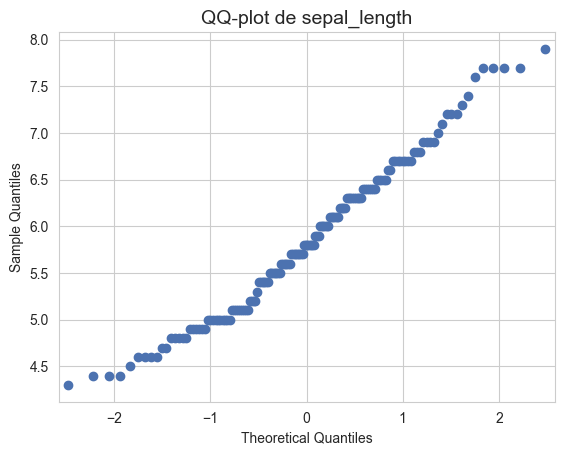

<Figure size 800x500 with 0 Axes>

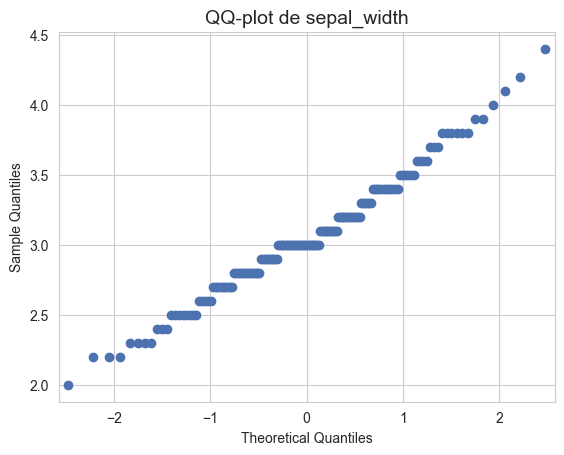

<Figure size 800x500 with 0 Axes>

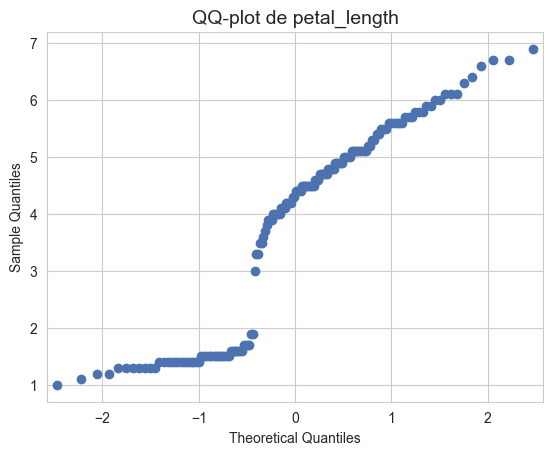

<Figure size 800x500 with 0 Axes>

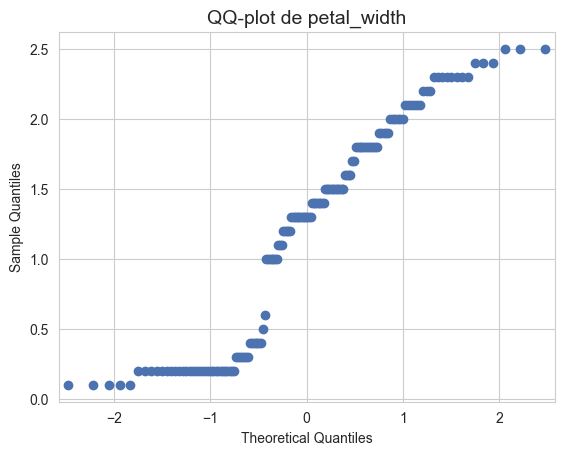

<Figure size 800x500 with 0 Axes>

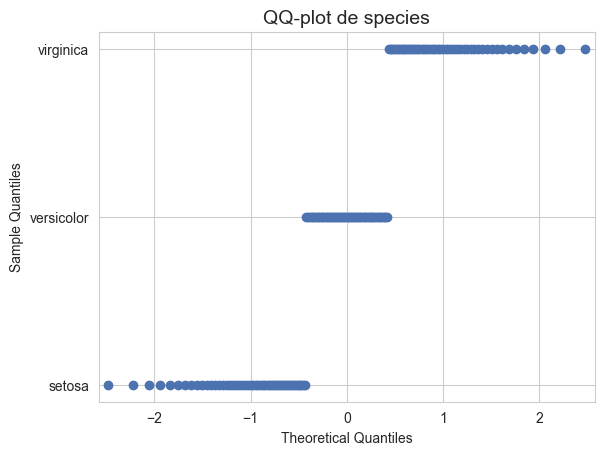

<Figure size 800x500 with 0 Axes>

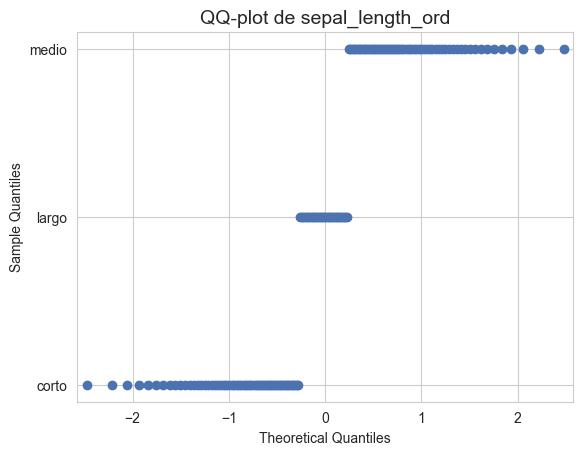

In [47]:
# Loop para generar QQ-plot de cada variable
for col in iris.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sm.qqplot(iris[col])
    plt.title(f'QQ-plot de {col}', fontsize=14)
    plt.show()

In [48]:
iris_numeric

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Los QQ-plots obtenidos para el dataset iris se utilizan para comparar la distribución de probabilidad teórica con la distribución de probabilidad empírica de cada variable en el dataset. Un QQ-plot es un gráfico de probabilidad que muestra la distribución de los datos frente a la distribución teórica esperada si los datos siguieran una distribución normal.

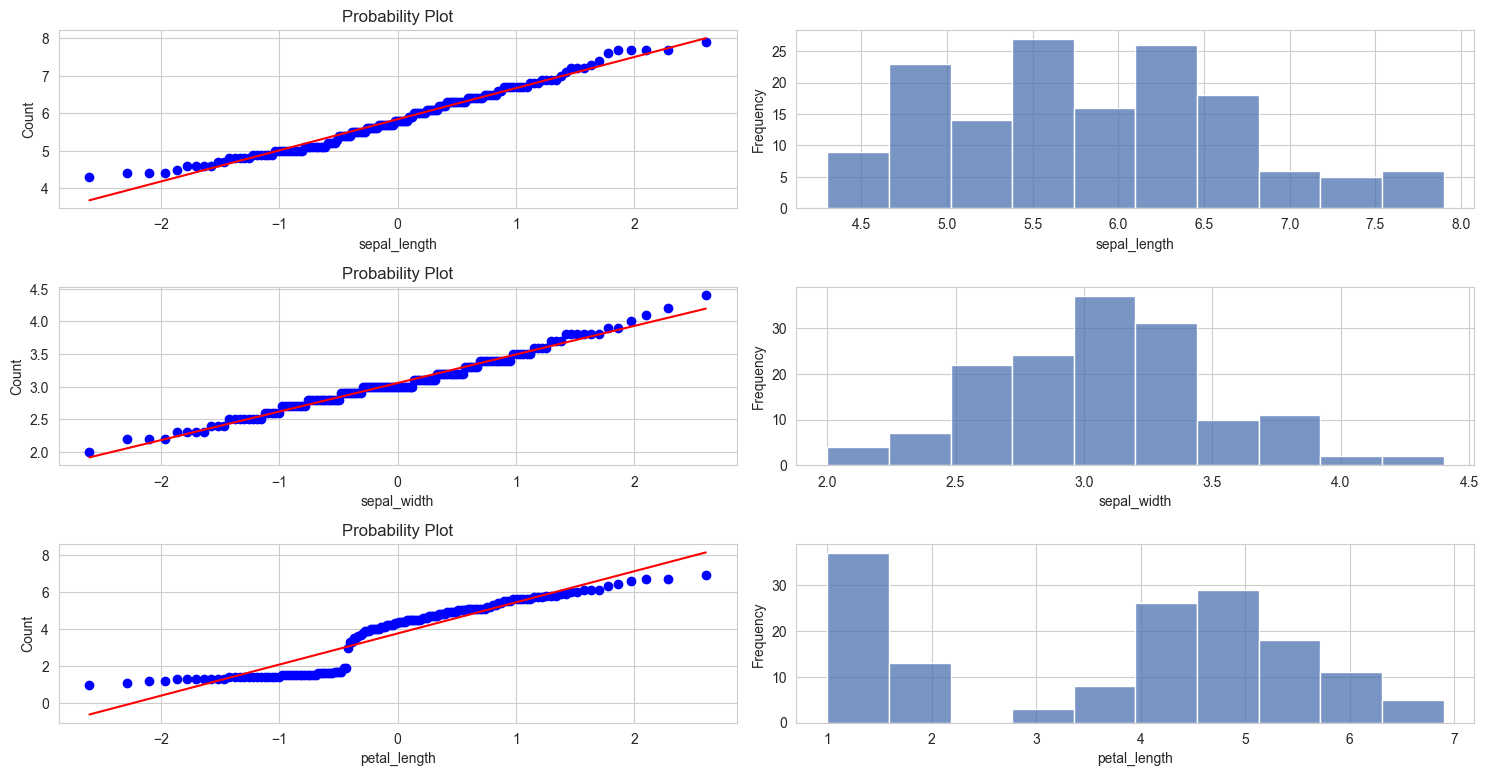

In [49]:
from matplotlib.gridspec import GridSpec
import scipy.stats as stats

# Crear figura con 2 columnas y 5 filas
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(4, 2, figure=fig)

# Loop para generar gráficas de barras e histogramas
for i, col in enumerate(iris_numeric.columns[:-1]):
    # Gráfica de barras
    ax = fig.add_subplot(gs[i, 0])
    stats.probplot(iris_numeric[col], plot=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Histograma
    ax = fig.add_subplot(gs[i, 1])
    sns.histplot(x=col, data=iris_numeric, ax=ax, bins=10)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

En los QQ-plots obtenidos para el dataset iris, se puede observar que las variables "sepal length", "sepal width" y "petal width" tienen una distribución aproximadamente normal, ya que los puntos se ajustan en gran medida a la línea diagonal. Sin embargo, la variable "petal length" no se ajusta bien a la línea diagonal, lo que indica que su distribución no es exactamente normal. 

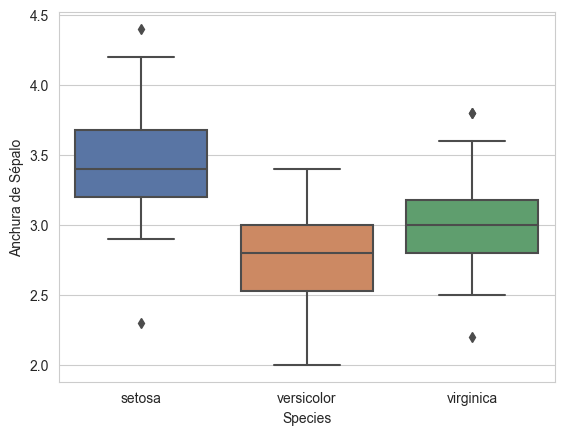

In [50]:
# sepal_width es una variable normal (p = 0.1011)
fig, ax = plt.subplots() 
sns.boxplot(data=iris, 
            y="sepal_width",
            x="species")
ax.set(xlabel="Species", 
       ylabel="Anchura de Sépalo")
plt.show()

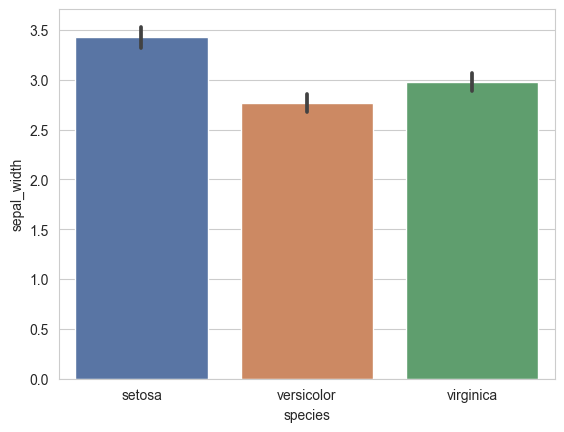

In [51]:
sns.barplot(data=iris, 
            y="sepal_width",
            x="species",
            estimator=np.mean)
ax.set(xlabel="Species", 
       ylabel="Anchura de Sépalo")
plt.show()

La prueba T es una prueba estadística utilizada para comparar las medias de dos grupos de datos numéricos. Es una prueba paramétrica que se basa en la distribución t de Student. En el caso del dataset iris, se podría utilizar la prueba T para comparar la media de la longitud del sépalo entre las flores de la especie setosa y las flores de la especie versicolor. Para realizar esta prueba, es necesario verificar si se cumplen los supuestos de normalidad y homogeneidad de varianza. La normalidad puede ser evaluada mediante la prueba de Shapiro-Wilk y la homogeneidad de varianza mediante la prueba de Levene. 

Si se cumplen los supuestos, se puede realizar la prueba T para determinar si existe una diferencia significativa entre las dos medias. Si el valor p de la prueba es menor que el nivel de significancia (usualmente 0.05), se puede rechazar la hipótesis nula y concluir que hay una diferencia significativa entre las medias de los dos grupos.

In [52]:
setosa_sepal_length = iris.loc[iris['species'] == 'setosa', 'sepal_length']
versicolor_sepal_length = iris.loc[iris['species'] == 'versicolor', 'sepal_length']

alpha = 0.05
stat, p = ttest_ind(setosa_sepal_length, versicolor_sepal_length)
if p < alpha:
    print('Con un nivel de significancia del', alpha*100, '%, se rechaza la hipótesis nula y se concluye que hay diferencias significativas entre las longitudes de sépalo de las especies Setosa y Versicolor.')
else:
    print('Con un nivel de significancia del', alpha*100, '%, no se puede rechazar la hipótesis nula y se concluye que no hay diferencias significativas entre las longitudes de sépalo de las especies Setosa y Versicolor.')

Con un nivel de significancia del 5.0 %, se rechaza la hipótesis nula y se concluye que hay diferencias significativas entre las longitudes de sépalo de las especies Setosa y Versicolor.


#### (Extra, Pruebas Paramétricas)
Las pruebas paramétricas reciben su nombre porque asumen que los datos provienen de una distribución paramétrica, es decir, una distribución con una forma específica definida por un conjunto de parámetros. En estas pruebas, se utilizan medidas estadísticas que dependen de los parámetros de la distribución, como la media y la desviación estándar, para inferir sobre la población a partir de una muestra de datos.

Estas pruebas requieren que se cumplan ciertos supuestos, como la normalidad y la homogeneidad de varianza, para que los resultados sean válidos. Si se cumplen estos supuestos, se puede utilizar la prueba paramétrica apropiada para realizar inferencias sobre la población. 

## Regresión Lineal

In [53]:
X = iris['petal_length']
y = iris['petal_width']

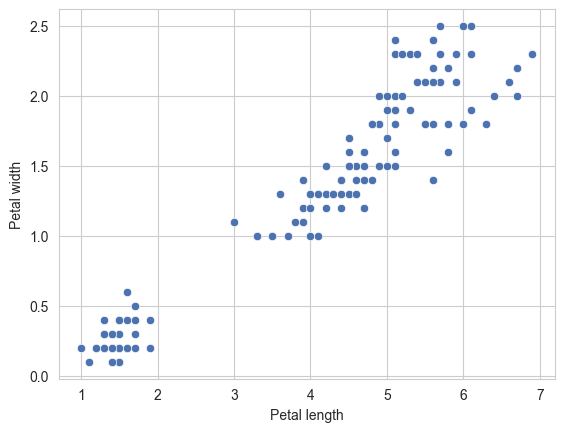

In [54]:
sns.scatterplot(x=X, y=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [55]:
pearsonr(iris['petal_width'], iris['petal_length'])

PearsonRResult(statistic=0.962865431402796, pvalue=4.675003907328653e-86)

En este caso, el valor de 0.962865431402796 indica una fuerte correlación positiva entre las dos variables analizadas.

En este caso, el valor del p-valor (4.675003907328653e-86) es muy cercano a cero, lo que indica que la correlación es altamente significativa y que es muy poco probable que se deba al azar.

In [56]:
model= sm.OLS(y, X).fit()

In [57]:
# Crear una serie con valores aleatorios entre 2 y 3
serie1 = pd.Series(np.random.uniform(2, 3, 50))

# Crear una serie con valores aleatorios entre 7 y 9
serie2 = pd.Series(np.random.uniform(7, 9, 50))

# Concatenar las dos series en una sola
X_test = pd.concat([serie1, serie2], ignore_index=True)

In [58]:
y_pred = model.predict(X_test)
y_pred

0     0.75
1     0.67
2     0.92
3     0.81
4     0.80
      ... 
95    2.60
96    2.59
97    2.49
98    2.55
99    2.45
Length: 100, dtype: float64

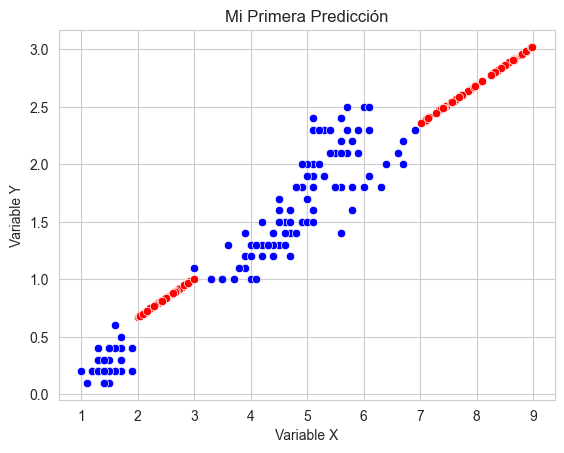

In [59]:
# Scatter plot con los datos originales
sns.scatterplot(x=X, y=y, color='blue')

# Datos predichos
sns.scatterplot(x=X_test, y=y_pred, color='red')

# Agregar etiquetas
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Mi Primera Predicción')

# Mostrar gráfico
plt.show()

In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Fri, 12 May 2023   Prob (F-statistic):                   1.22e-112
Time:                        14:41:18   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

El método summary() aplicado a un modelo de regresión de Mínimos Cuadrados Ordinarios (OLS) de Statsmodels proporciona una tabla que resume los resultados de la regresión. Esta tabla contiene información estadística relevante para la evaluación del modelo y la interpretación de sus resultados.

Variable Dependiente
La variable dependiente es una variable que se utiliza en un modelo estadístico para predecir o explicar las variaciones en otras variables, conocidas como variables independientes

Por ejemplo, si se utiliza el conjunto de datos de iris para estudiar cómo el ancho de los pétalos (petal_width) está relacionado con la longitud de los pétalos (petal_length), la variable dependiente sería el ancho de los pétalos, ya que se está midiendo para evaluar cómo cambia en función de la longitud de los pétalos, que es la variable independiente.


Variable Independiente

Las variables independientes son aquellas que se utilizan en un análisis estadístico o experimento para predecir o explicar cambios en la variable dependiente. Son las variables que se manipulan o controlan para determinar cómo afectan a otra variable en el experimento.

#### Métricas Importantes

*R-squared (uncentered):* este es el coeficiente de determinación no centrado, que representa la proporción de varianza en la variable dependiente que es explicada por la variable independiente en el modelo de regresión lineal.

Para algunas disciplinas, como las ciencias sociales, un valor de 0.2 o 0.3 puede ser considerado bueno, mientras que para otras, como las ciencias naturales, un valor de 0.7 o superior puede ser necesario para hacer afirmaciones concluyentes.

El F-statistic es una medida de la bondad de ajuste del modelo de regresión. Se calcula dividiendo la varianza explicada por el modelo entre la varianza no explicada. Un valor grande de F-statistic indica que el modelo es significativo y que la variable independiente tiene una relación estadísticamente significativa con la variable dependiente. En este caso, el valor de F-statistic no se proporciona en la muestra dada.

El Prob (F-statistic) es el valor p asociado con el F-statistic. Indica la probabilidad de que el F-statistic sea igual o mayor que el valor observado si la verdadera relación entre las variables independiente y dependiente es nula. Un valor bajo de Prob (F-statistic) indica que el modelo es significativo y que la variable independiente tiene una relación estadísticamente significativa con la variable dependiente. En este caso, no se proporciona el valor de Prob (F-statistic).

El Log-Likelihood es una medida de la bondad de ajuste de un modelo estadístico. Cuanto más cercano a cero sea el valor de Log-Likelihood, mejor será el ajuste del modelo. Por lo tanto, un valor de -8.7179 en el ejemplo dado indica un buen ajuste del modelo.

In [61]:
print(y)

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64


#### Utilizando sklearn

In [62]:
from sklearn.linear_model import LinearRegression

# Crear objeto de regresión lineal
lr_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr_model.fit(X, y)

# Imprimir el intercepto y los coeficientes
print('Intercepto: ', lr_model.intercept_)
print('Coeficientes: ', lr_model.coef_)

# Predecir los valores de y usando el conjunto de prueba
y_pred = lr_model.predict(X)

y_pred

ValueError: Expected 2D array, got 1D array instead:
array=[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Ambas bibliotecas, Scikit-learn (sklearn) y Statsmodels, tienen sus ventajas y desventajas dependiendo del contexto en el que se utilicen. Algunas de las ventajas de usar sklearn sobre statsmodels son:

Sklearn tiene una documentación más completa y fácil de seguir, lo que puede ser útil para los principiantes en aprendizaje automático.

Sklearn se centra en el aprendizaje automático y tiene una gran cantidad de algoritmos de aprendizaje automático incorporados, lo que permite a los usuarios implementar fácilmente diferentes modelos de aprendizaje automático.

Sklearn tiene una sintaxis más simple y concisa que statsmodels, lo que hace que sea más fácil de usar y entender.

Sklearn tiene una mejor integración con otras bibliotecas de Python, como pandas y numpy, lo que puede ser útil para trabajar con datos.

### Regresión Lineal Multiple

In [ ]:
# Definir las variables independientes y dependiente
X = iris[['petal_length', 'petal_width', 'sepal_length']]
y = iris['sepal_width']

# Comprobar la multicolinealidad
matriz_correlacion = X.corr()
print('Matriz de correlación: \n', matriz_correlacion)

# Eliminar la variable sepal_length
X = X.drop('sepal_length', axis=1)

# Ajustar el modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X, y)

# Imprimir el intercepto y los coeficientes
print('\nIntercepto: ', modelo_lr.intercept_)
print('Coeficientes: ', modelo_lr.coef_)

# Realizar predicciones usando el conjunto de prueba
y_pred = modelo_lr.predict(X)

# Calcular el valor de R-cuadrado
r_cuadrado = modelo_lr.score(X, y)

# Imprimir el valor de R-cuadrado
print('R-cuadrado: ', r_cuadrado)

Matriz de correlación: 
               petal_length  petal_width  sepal_length
petal_length          1.00         0.96          0.87
petal_width           0.96         1.00          0.82
sepal_length          0.87         0.82          1.00

Intercepto:  3.5800400563392176
Coeficientes:  [-0.26  0.38]
R-cuadrado:  0.2087622329837442
